In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


# **EMPLOYEE ATTRITION PREDICTION**

**AIM :**
* Explore , Visualise and Analyse the Dataset and
* Developing a ML Classification model using given Dataset with **Target : Attrition** and Analysing and Determining the factor responsible for attrition of employee 

**ABOUT NOTEBOOK**

**NOTEBOOK SECTIONS :**

* 1) DATA LOADING AND DATA INSIGHTS(SHAPE , COLUMNS ,INFORMATION )
* 2) DATA CLEANING (HANDLING NULL ,DROPPING IRRELEVANT FEATURES)
* 3) DATA VISUALISATION & PLOTTING CORRELATION HEATMAP
* 4) FEATURE ENGINEERING (HANDING OUTLIERS ,REMOVING IRRELEVANT FEATURES)
* 5) CATEGORICAL VARIABLES ENCODING
* 6) HANDLING DATA IMBALANCE (SMOTE)
* 7) SPLITTING DATA INTO TRAINING AND TESTING SETS
* 8) SCALING DATA USING STANDARDSCALER
* 9) MODEL SELECTION BASED ON CROSS VAL SCORES (SCORING - NEG MEAN SQ ERROR) USING
       LOGISTIC REGRESSION , RANDOM FOREST , SUPPORT VECTOR MACHINE
       DECISION TREE
    
* 10) MODEL OPTIMAL PARAMETER SELECTION USING GRIDCV
* 11) MODEL BUILDING USING ABOVE RESULTS
* 12) ESTIMATING CLASSIFICATION REPORT(ACCURACY PRECISION F1 RECALL) AND PLOTTING CONFUSION MATRIX
* 13) FINDING MOST IMPORTANT FEATURES OF CLASSIFICATION 


**IMPORTING THE LIBRARIES**

In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#MODEL SELECTION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

#FEATURE IMPORTANCE
from sklearn.inspection import permutation_importance

In [3]:
path  = '/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv'

df =pd.read_csv(path)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# ***EDA (Exploratory Data Analysis)***

In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.select_dtypes('int64' ,'float64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
cat_cols = df.select_dtypes('object').columns
cat_cols


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


***ALL CATEGORICAL COLUMNS***

In [10]:
for cat in cat_cols:
    print(cat ,'-> ' , df[cat].unique())
    print()

Attrition ->  ['Yes' 'No']

BusinessTravel ->  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department ->  ['Sales' 'Research & Development' 'Human Resources']

EducationField ->  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender ->  ['Female' 'Male']

JobRole ->  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus ->  ['Single' 'Married' 'Divorced']

Over18 ->  ['Y']

OverTime ->  ['Yes' 'No']



In [11]:
print("All columns Unique values count")
for col in df:
    print(col, len(df[col].unique()), sep=': ')

All columns Unique values count
Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


# ***DATA VISUALISATION***

**VIEWING AND ANALYSING DATA INSIGHT**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Attrition')

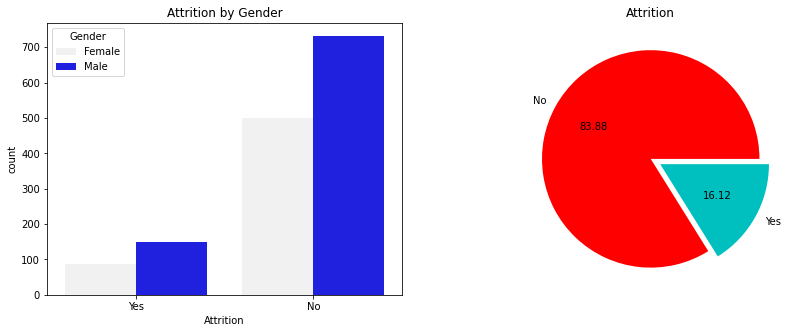

In [12]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot(df['Attrition'] ,color ='b' ,hue =df['Gender'])
plt.title('Attrition by Gender')
plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts() ,colors =['r' ,'c'] ,explode =[0,0.1]  ,autopct = '%.2f' ,labels =['No' ,'Yes'])

plt.title('Attrition')

***We observe a very high data imbalance here so we'll use Sampling technique to balance it**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


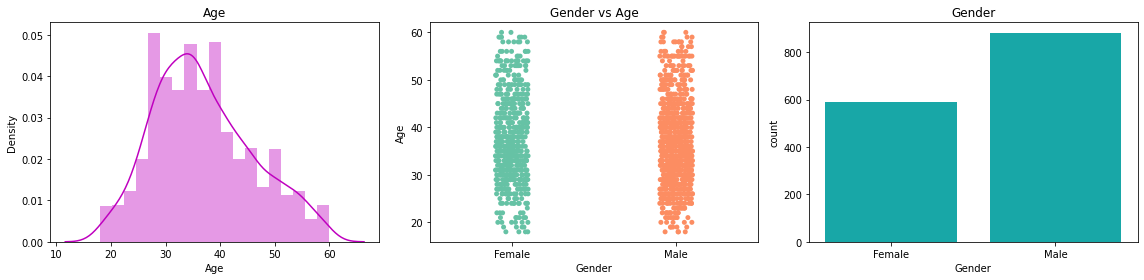

In [13]:
plt.figure(figsize =(16 ,4))
plt.subplot(1,3,1)
sns.distplot(df['Age'] ,color ='m')
plt.title('Age')
plt.subplot(1 , 3 ,2)
sns.stripplot(x = 'Gender' ,y = 'Age' ,data = df ,palette="Set2")
plt.title('Gender vs Age')
plt.subplot(1,3,3)
sns.countplot('Gender' ,data = df ,color ='c')
plt.title('Gender')
plt.tight_layout()

<AxesSubplot:xlabel='count', ylabel='JobRole'>

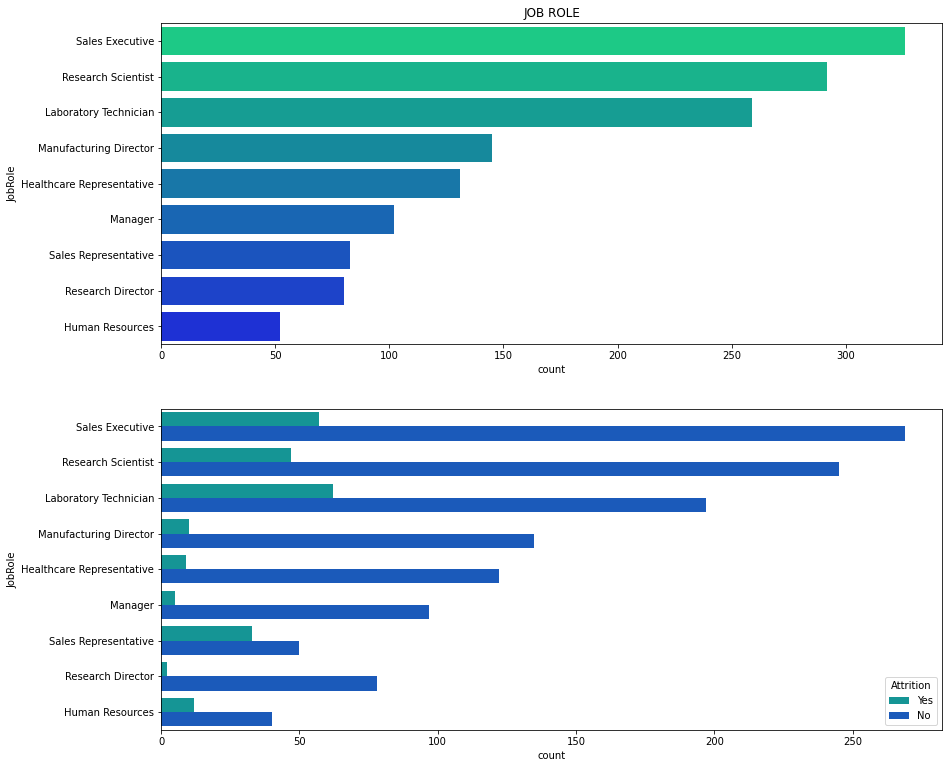

In [14]:
plt.figure(figsize = (14 , 13))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r')
plt.title('JOB ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole' ,data = df ,palette='winter_r'  ,hue =df['Attrition'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.patches.Wedge at 0x7f726a201190>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.40962060765041874, -1.1279232942838364, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37'),
  Text(0.23894535446274423, -0.6579552549989045, '30.34'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29')])

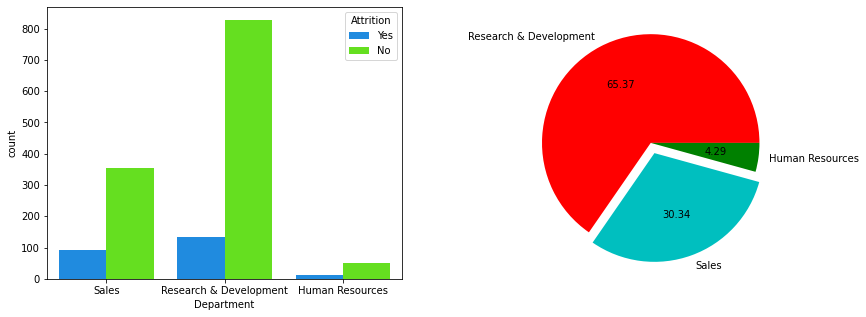

In [15]:
plt.figure(figsize =(14,5))
plt.subplot(1,2,1)
sns.countplot('Department' ,data = df ,hue ='Attrition' ,palette='gist_rainbow_r')
plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts() ,autopct ='%.2f' ,colors = ['r' ,'c' ,'g'],labels =['Research & Development','Sales', 'Human Resources'] ,explode =[0 ,0.1,0])

In [16]:
#HANDLING CATEGORICAL OUTPUT VARIABLE
df['Attrition'].replace({'Yes':1 ,'No':0} ,inplace = True)
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

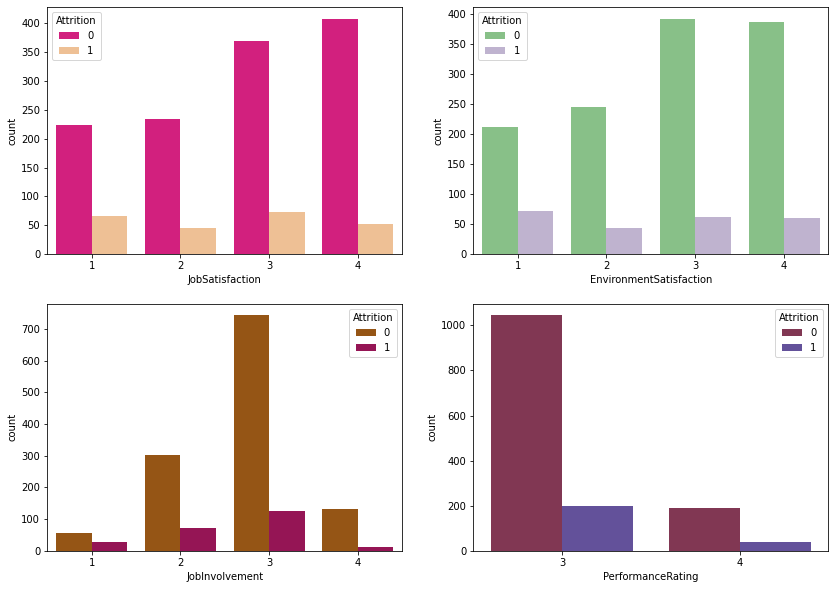

In [17]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['JobSatisfaction'] ,hue =df['Attrition'] ,palette='Accent_r')
plt.subplot(2,2,2)
sns.countplot(df['EnvironmentSatisfaction'] ,hue =df['Attrition'] ,palette='Accent')
plt.subplot(2,2,3)
sns.countplot(df['JobInvolvement'] ,hue =df['Attrition'] ,palette='brg_r')
plt.subplot(2,2,4)
sns.countplot(df['PerformanceRating'] ,hue =df['Attrition'] ,palette='twilight_r')


<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

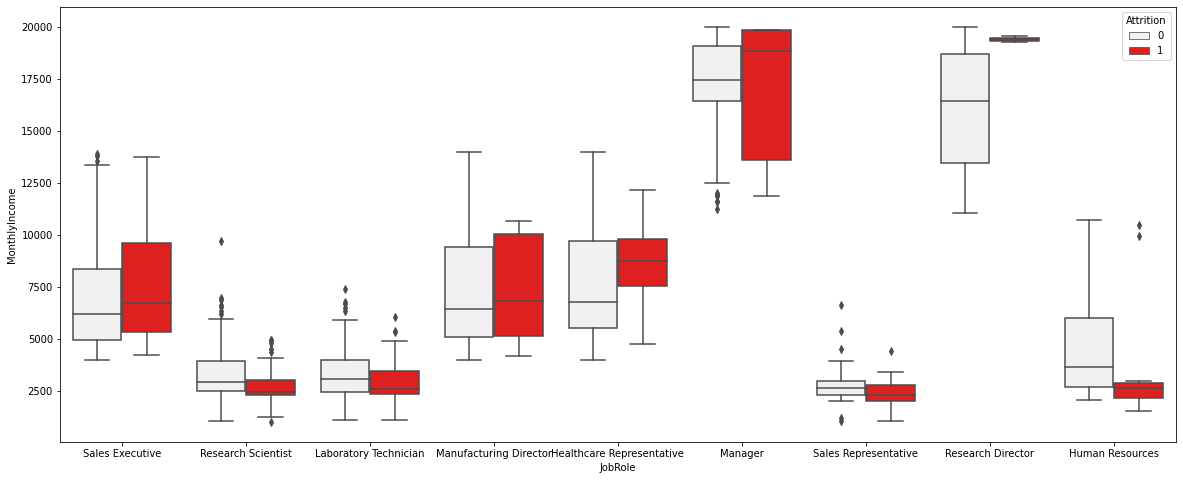

In [18]:
plt.figure(figsize =(20 ,8))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = df ,hue ='Attrition' ,color ='red')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

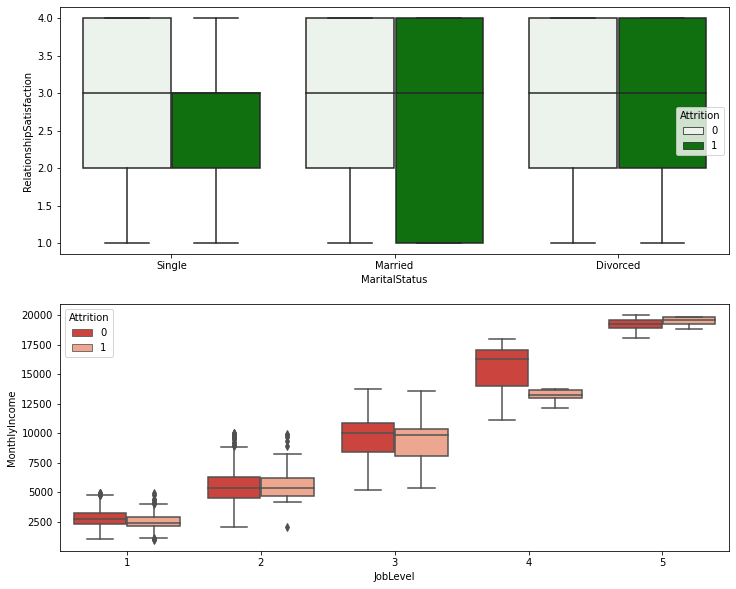

In [19]:
plt.figure(figsize =(12,10))
plt.subplot(2,1,1)
sns.boxplot(x = 'MaritalStatus' ,y ='RelationshipSatisfaction' ,data = df ,hue = 'Attrition', color = 'g')
plt.subplot(2,1,2)
sns.boxplot(df['JobLevel'],df['MonthlyIncome'] ,hue = df['Attrition'] ,palette='Reds_r')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

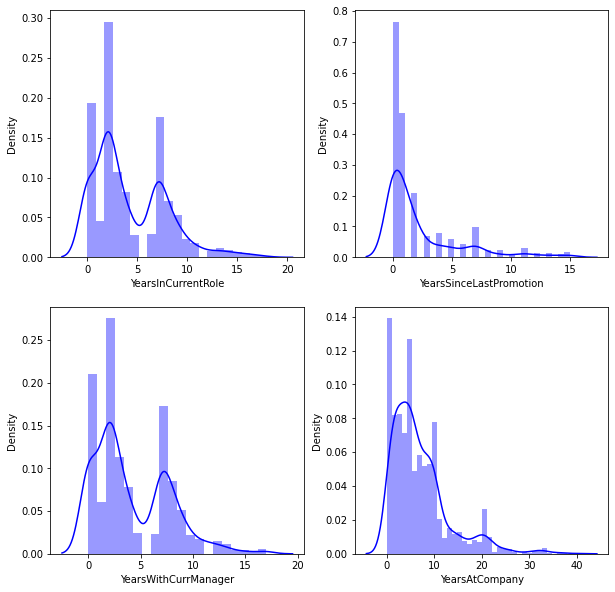

In [20]:

col = ['YearsInCurrentRole' ,'YearsSinceLastPromotion' ,'YearsWithCurrManager' ,'YearsAtCompany']
plt.figure(figsize = (10 ,10))
for i,c in enumerate(col):
    plt.subplot(2 ,2,i+1)
    sns.distplot(df[c] ,color ='b')
    

**CORRELATION MATRIX**

<AxesSubplot:>

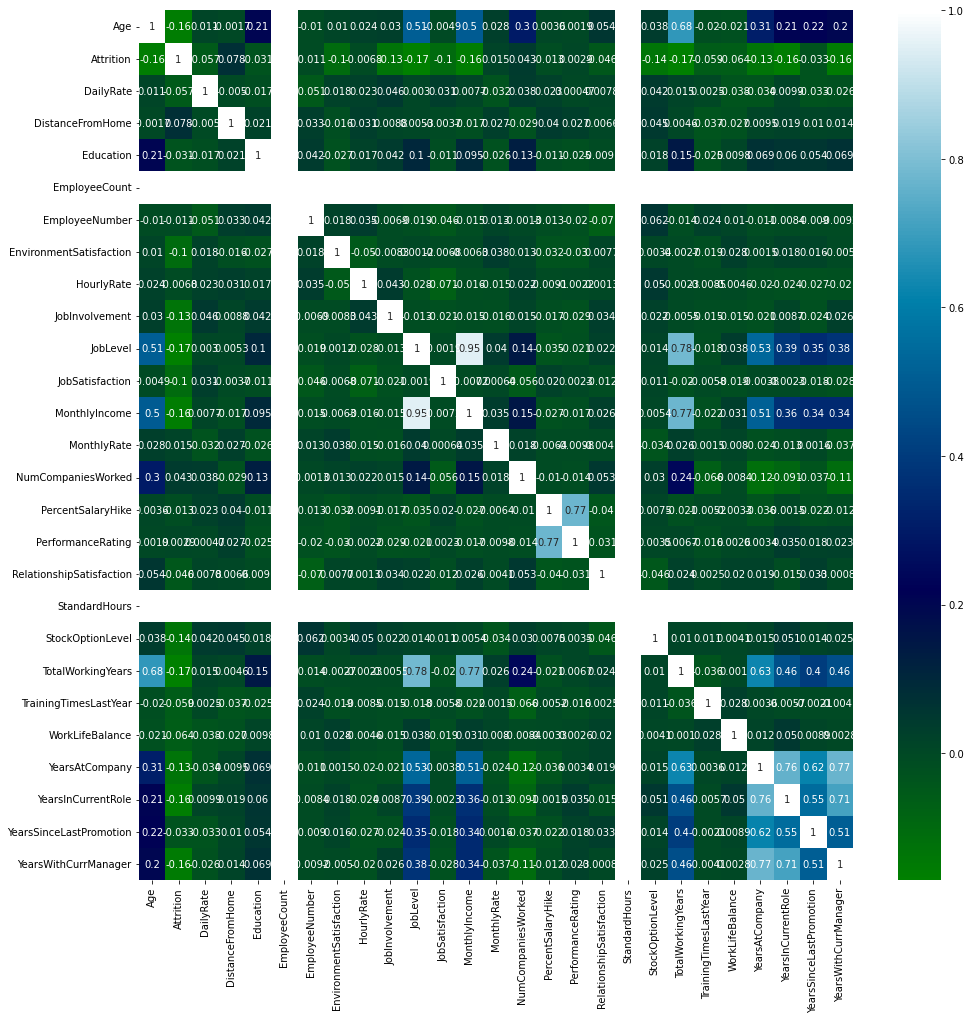

In [21]:
plt.figure(figsize = (16 ,16))
sns.heatmap(df.corr() ,cmap = 'ocean' , cbar = True , annot = True)

# ***FEATURE ENGINEERING***

**REMOVING IRRELEVANT FEATURES**

In [22]:
no_use = []
for col in df.columns:
    if(len(df[col].unique()) ==1):
        no_use.append(col)
        
       
no_use       

['EmployeeCount', 'Over18', 'StandardHours']

In [23]:
df.drop(columns = no_use , axis = 1 , inplace = True)

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

****

**BINARY FEATURES ENCODING**

In [25]:
y_n_type = []
others =[]
for col in df.select_dtypes('object').columns:
    if(len(df[col].unique()) ==2):
        y_n_type.append(col)
        
y_n_type        

['Gender', 'OverTime']

In [26]:
df['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)
df['OverTime'].replace({'Yes':1 ,'No':0} ,inplace = True)

**CATEGORICAL FEATURES ENCODING**

In [27]:
others = df.select_dtypes('object').columns
others

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [28]:
le = LabelEncoder()
for col in others:
    df[col] = le.fit_transform(df[col])


In [29]:
df.select_dtypes('object').columns

Index([], dtype='object')

**SPLITTING DATASET INTO FEATURES -> X AND TARGET -> Y**

In [30]:
x = df.drop('Attrition' ,axis =1)
y = df['Attrition']

print(x.shape ,y.shape)

(1470, 31) (1470,)


**HANDLING CLASS IMBALANCE**

* About 84 % of data are of class label 0 and only 16 % of data are of class label 1. 
* This creates Class Imbalance. 
* It is necessary to remove because even if we create a classifier which everytime predicts Attrition as 'No' will also achieve an overall accuracy of 84%, which is meaningless.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attrition', ylabel='count'>

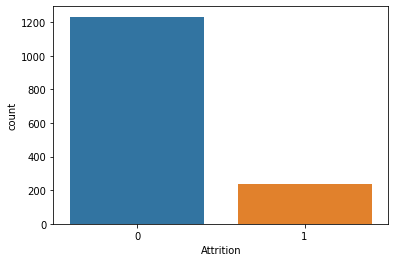

In [31]:
sns.countplot(df['Attrition'])

In [32]:
(df.Attrition.value_counts()/1470)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [33]:
smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x ,y)

print(x.shape ,y.shape)

(2466, 31) (2466,)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Now Class is Balanced')

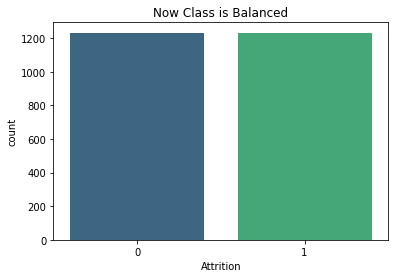

In [34]:
#now balanced
y.value_counts()
sns.countplot(y ,palette='viridis')
plt.title('Now Class is Balanced')

**SPLITTING DATA INTO TRAINING AND TESTING SETS**

In [35]:
x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.2 , random_state= 52)
print(x_train.shape)

(1972, 31)


**SCALING THE DATA**

In [36]:
#scaling the data 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


x_train

array([[-0.73172112, -0.80508169,  0.85203997, ..., -0.75681849,
        -0.31876373, -0.74551854],
       [ 0.74021882, -2.34646138, -1.12959229, ..., -0.1638721 ,
         0.36190988, -0.13064503],
       [ 0.96667112,  0.73629801,  1.81636368, ..., -0.46034529,
        -0.31876373, -0.13064503],
       ...,
       [-0.84494727, -0.80508169,  0.40431824, ..., -1.05329168,
        -0.65910054, -1.05295529],
       [-0.05236422,  0.73629801, -0.31627531, ...,  1.31849387,
        -0.65910054,  0.79166523],
       [-0.39204267,  0.73629801, -0.11758224, ...,  0.13260109,
        -0.31876373,  0.48422848]])

# ***MODEL SELECTION***

**CROSS VALIDATION**

In [37]:
k = KFold(n_splits = 5)

**LOGISTIC REGRESSION**

In [38]:
lr_model = LogisticRegression()
lr_score = cross_val_score(lr_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
lr_score.mean()

-0.17951423247445866

**RANDOM FOREST CLASSIFIER**

In [39]:
rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.09838591531195785

**SUPPORT VECTOR MACHINE CLASSIFIER**

In [40]:
svm_model = SVC()
svm_score = cross_val_score(svm_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
svm_score.mean()

-0.1070063612414059

**DECISION TREE CLASSIFIER**

In [41]:
dt_model = DecisionTreeClassifier()
dt_score = cross_val_score(dt_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.1937068688556191

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neg Mean square error')

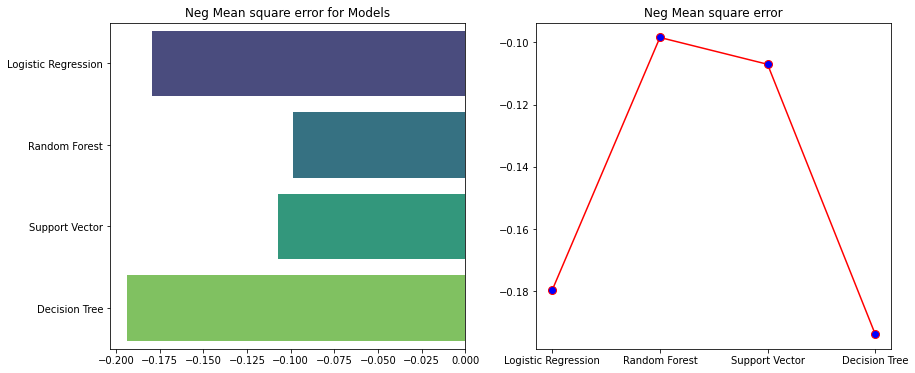

In [42]:
plt.figure(figsize = (14 , 6))
plt.subplot(1,2,1)
x = ['Logistic Regression','Random Forest' ,'Support Vector' ,'Decision Tree']
y = [lr_score.mean() , rf_score.mean() ,svm_score.mean() , dt_score.mean()]
plt.title('Neg Mean square error for Models')
sns.barplot(y,x,palette="viridis")

plt.subplot(1,2,2)
plt.plot(x ,y,marker = 'o' ,color = 'r',mfc ='b' ,ms =8 )
plt.title('Neg Mean square error')

**OBSERVATIONS**
* WE OBTAINED LESS -VE MEAN SQ ERROR FOR BOTH RFC AND SVC (NEARLY SAME)
* LETS TRY OPTIMAL PARAMETER TEST FOR BOTH

**MODEL OPTIMAL PARAMETER SELECTION USING GRID SEARCH CV**

In [43]:
#we obtained less less -ve mena sq error for SVC and random forest 
#lets try building model with both of them 

In [44]:

model_params ={
    'RandomForestClassifier':
    {
        'model':RandomForestClassifier(),
        'param':
        {
         'n_estimators':[10 ,50 ,100,130],
         'criterion':['gini' ,'entropy'],
         'max_depth':range(4,8,1),
         'max_features':['auto' ,'log2']
        }
    },
    'SVC':
    {
        'model':SVC(),
        'param':
        {
            'C':[1,20],
            'gamma':[1,0.1],
            'kernel':['rbf']     
        }
    }
}

In [45]:
scores =[]
for model_name , mp in model_params.items():
    model_sel = GridSearchCV(estimator= mp['model'] ,param_grid= mp['param'] ,cv = 4 ,return_train_score=False)
    model_sel.fit(x_train,y_train)
    
    scores.append({
        'model':model_name,
        'best_score':model_sel.best_score_,
        'best_params':model_sel.best_params_
    })

In [46]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8777890466531441,
  'best_params': {'criterion': 'gini',
   'max_depth': 7,
   'max_features': 'auto',
   'n_estimators': 100}},
 {'model': 'SVC',
  'best_score': 0.9376267748478702,
  'best_params': {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}}]

# ***MODEL BUILIDNG***

**SELECTED MODEL -> SVC MODEL**

In [47]:
svm_model = SVC(C=20 ,gamma=0.1 ,kernel='rbf')
svm_model.fit(x_train ,y_train)
ytest_pred = svm_model.predict(x_test)
ytrain_pred = svm_model.predict(x_train)
accuracy_score(y_test ,ytest_pred)


0.9392712550607287

**MODEL SCORES REPORT**

In [48]:
print(classification_report(y_test , ytest_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       231
           1       0.97      0.92      0.94       263

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



In [49]:
print(classification_report(y_train , ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1002
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



# ***CONFUSION MATRIX***

<AxesSubplot:>

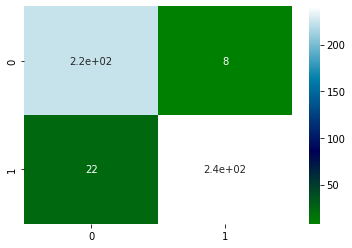

In [50]:
sns.heatmap(confusion_matrix(y_test ,ytest_pred) ,annot = True ,cmap ='ocean')

<AxesSubplot:>

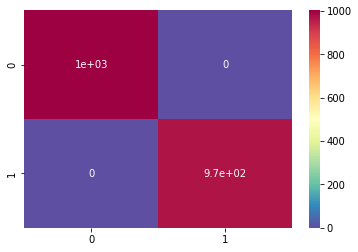

In [51]:
sns.heatmap(confusion_matrix(y_train ,ytrain_pred) ,annot = True ,cmap ='Spectral_r')

# ***DETERMINING FEATURE IMPORTANCE***

In [52]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm_model, x_test, y_test)

In [53]:
perm_importance

{'importances_mean': array([0.02064777, 0.01902834, 0.01417004, 0.00728745, 0.01417004,
        0.01295547, 0.01295547, 0.01983806, 0.02388664, 0.0097166 ,
        0.0194332 , 0.01619433, 0.02834008, 0.0242915 , 0.03360324,
        0.01336032, 0.02348178, 0.01902834, 0.02550607, 0.01376518,
        0.01417004, 0.02226721, 0.02024291, 0.03198381, 0.02024291,
        0.02388664, 0.02712551, 0.02834008, 0.02550607, 0.03684211,
        0.02995951]),
 'importances_std': array([0.00534045, 0.00274588, 0.00384082, 0.00608635, 0.00600502,
        0.00274588, 0.00352947, 0.00268553, 0.00236071, 0.00151484,
        0.00608635, 0.00527871, 0.0077876 , 0.00479035, 0.00566802,
        0.00274588, 0.00595018, 0.00489192, 0.00242915, 0.00323887,
        0.00256055, 0.0051211 , 0.00362116, 0.01066554, 0.00829713,
        0.00348272, 0.00621955, 0.00849238, 0.00634995, 0.00468657,
        0.00502416]),
 'importances': array([[0.02834008, 0.02226721, 0.02226721, 0.01214575, 0.01821862],
        [0.01821

In [54]:
perm_importance.importances_mean

array([0.02064777, 0.01902834, 0.01417004, 0.00728745, 0.01417004,
       0.01295547, 0.01295547, 0.01983806, 0.02388664, 0.0097166 ,
       0.0194332 , 0.01619433, 0.02834008, 0.0242915 , 0.03360324,
       0.01336032, 0.02348178, 0.01902834, 0.02550607, 0.01376518,
       0.01417004, 0.02226721, 0.02024291, 0.03198381, 0.02024291,
       0.02388664, 0.02712551, 0.02834008, 0.02550607, 0.03684211,
       0.02995951])

In [55]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

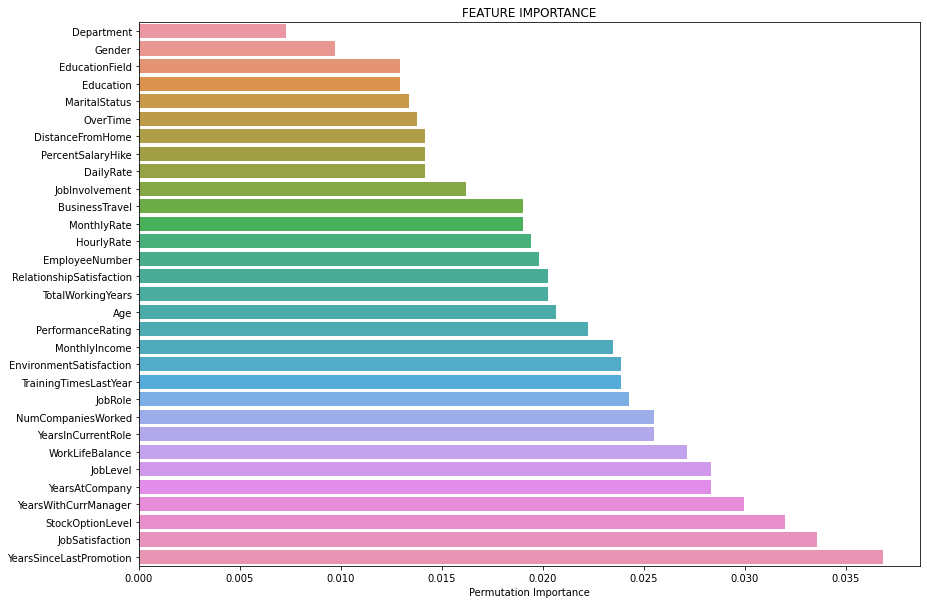

In [56]:
 cols = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
    
features = np.array(cols)
plt.figure(figsize = (14 ,10))    
sorted_idx = perm_importance.importances_mean.argsort()
sns.barplot( perm_importance.importances_mean[sorted_idx] ,features[sorted_idx] )
plt.xlabel("Permutation Importance")

plt.title('FEATURE IMPORTANCE')